In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [87]:
# Create Logistic Regression with Gradient Ascent
class LogisticRegression_GA:  
    ''' This code was adapted from: 
    https://vasugupta2000.medium.com/implementation-of-gradient-ascent-using-logistic-regression-7f5343877c21'''
    
    def __init__(self, learning_rate= 0.01, ga_iterations=300):
        
        # Initialize parameters
        self.learning_rate = learning_rate
        self.ga_iterations = ga_iterations
        self.likelihoods = []
        
        # Define epsilon so the natural logarithm is not undefined
        self.epsilon = 1e-7

        
    def logistic_func(self, z):
        
        # Apply logistic function to linear parameters
        f_z = 1/(1+np.exp(-z))
        
        # Error implementation
        assert (z.shape == f_z.shape)
        return f_z
    
    
    def log_likelihood(self, y_true, y_pred):
        
        # Fix 0/1 values in y_pred so that log is not undefined
        y_pred = np.maximum(np.full(y_pred.shape, self.epsilon), np.minimum(np.full(y_pred.shape, 1-self.epsilon), y_pred))
        
        # Method from code sourced - TEST
        likelihood = sum(y_true*np.log(y_pred)+(1-y_true)*np.log(1-y_pred))
        
        return -likelihood
    
    
    def fit(self, X, y):
        
        num_examples = X.shape[0]
        num_features = X.shape[1]
        
        # Initialize weights with appropriate shape
        self.weights = np.zeros(num_features)
                
        # Perform gradient ascent
        for i in range(self.ga_iterations):
            
            z = np.dot(X, self.weights)
            
            y_pred = self.logistic_func(z)
    
            # Calculate the gradient values
            gradient = np.dot(X.T,(y-y_pred)) 
            
            # Update the weights
            self.weights = self.weights - 0.001*self.learning_rate*self.weights +    \
            (self.learning_rate/num_examples)*gradient        
            
            # Calculating log likelihood
            likelihood = self.log_likelihood(y,y_pred)
            
            self.likelihoods.append(likelihood)
    
    
    
    def predict_proba(self,X):
    
        if self.weights is None:
            raise Exception("Fit the model before prediction")
                     
        z = np.dot(X,self.weights)
        probabilities = self.logistic_func(z)
                
        return probabilities
    
    
    def predict(self, X, threshold=0.5):
        # Thresholding probability to predict binary values
        binary_predictions = np.array(list(map(lambda x: 1 if x>threshold else 0, self.predict_proba(X))))
        
        return binary_predictions

## Problem 1.a
**General:**
- Implement logistic regression learning by gradient ascent
- Before, normalize training set to have zero mean and sd 1
- Apply transformation to the test set using mean and sd of the training set 

**Specifications:**
- Use Gisette data
- Train logistic regressor on training set
- Start with $w^{(0)} = 0$
- With 300 gradient ascent iterations and $\lambda=0.001$ in update equation:
    - $w^{(t+1)} = w^{(t)} - \eta\lambda w^{(t)} - \frac{\eta}{N} \frac{\partial}{\partial w}L(w^{(t)})$
    - Where $L(w^{(t)})$ is the negative log likelihood
    - Observe that there is an extra factor of $\frac{1}{N}$ in the loss term compared to class
    
**Requested output:**
- Find a good learning rate $\eta$ such the negative log-likelihood converges in at most 300 ierations and is monotonically decreasing
- Plot the negative log-likelihood vs iteration number
- Report in a table the misclassification error on the training and test set

In [88]:
# Data input
X_train_a = pd.read_csv('data/Gisette/gisette_train.data', sep='\s+', header=None)
y_train_a = pd.read_csv('data/Gisette/gisette_train.labels', header=None)

X_test_a = pd.read_csv('data/Gisette/gisette_valid.data',  sep='\s+', header=None)
y_test_a = pd.read_csv('data/Gisette/gisette_valid.labels', header=None)

In [89]:
# Normalize the variables of the training set
scaler_a = StandardScaler()
scaler_a.fit(X_train_a)

StandardScaler()

In [90]:
# Transform both the train and test set
X_train_scaled_a = scaler_a.transform(X_train_a)
X_test_scaled_a = scaler_a.transform(X_test_a)

In [91]:
# Prepare data to change -1 into 0s
y_train_a = y_train_a.values.ravel()
y_test_a = y_test_a.values.ravel()

In [92]:
# Change -1 into 0s
for i in range(len(y_train_a)):
    if y_train_a[i] < 0:
        y_train_a[i] = 0
        
for i in range(len(y_test_a)):
    if y_test_a[i] < 0:
        y_test_a[i] = 0

In [93]:
model_a = LogisticRegression_GA(learning_rate=0.15) #0.15 is best so far
model_a.fit(X_train_scaled_a,y_train_a)

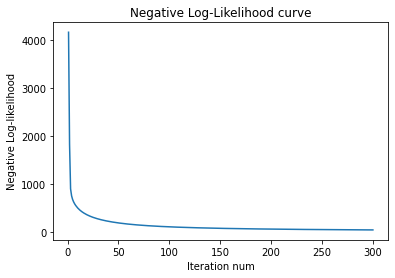

In [94]:
plt.plot([i+1 for i in range(len(model_a.likelihoods))], model_a.likelihoods)
plt.title("Negative Log-Likelihood curve")
plt.xlabel("Iteration num")
plt.ylabel("Negative Log-likelihood")
plt.show()

In [95]:
# Training Misclassification
preds_train_a = model_a.predict(X_train_scaled_a)
1 - accuracy_score(y_train_a, preds_train_a)

0.0

In [96]:
# Testing Misclassification
preds_test_a = model_a.predict(X_test_scaled_a)
1 - accuracy_score(y_test_a, preds_test_a)

0.020000000000000018

## Problem 1.b
- Repeat problem 1.a on the *hill-valley* dataset

In [97]:
# Data input
X_train_b = pd.read_csv('data/hill-valley/X.dat', sep='\s+', header=None)
y_train_b = pd.read_csv('data/hill-valley/Y.dat', header=None)

X_test_b = pd.read_csv('data/hill-valley/Xtest.dat',  sep='\s+', header=None)
y_test_b = pd.read_csv('data/hill-valley/Ytest.dat', header=None)

In [111]:
type(X_train_b)

pandas.core.frame.DataFrame

In [114]:
X_train_scaled_b

array([[-0.44166458, -0.44356351, -0.44100773, ..., -0.44595977,
        -0.44194172, -0.44501586],
       [-0.44372966, -0.44551188, -0.44303191, ..., -0.44808909,
        -0.44392922, -0.44711434],
       [ 3.34193057,  3.25945986,  3.61200678, ...,  3.56767136,
         3.30328408,  3.75536   ],
       ...,
       [-0.44353642, -0.4453259 , -0.442843  , ..., -0.44789921,
        -0.44374187, -0.44692642],
       [-0.44377408, -0.44555054, -0.4430697 , ..., -0.44812752,
        -0.44396481, -0.44714912],
       [-0.44040132, -0.44232323, -0.43962642, ..., -0.44450914,
        -0.4407053 , -0.44362698]])

In [99]:
# Normalize the variables of the training set
scaler_b = StandardScaler()
scaler_b.fit(X_train_b)

StandardScaler()

In [100]:
# Transform both the train and test set
X_train_scaled_b = scaler_b.transform(X_train_b)
X_test_scaled_b = scaler_b.transform(X_test_b)

In [101]:
# Prepare data to change -1 into 0s
y_train_b = y_train_b.values.ravel()
y_test_b = y_test_b.values.ravel()

In [102]:
# Change -1 into 0s
for i in range(len(y_train_b)):
    if y_train_b[i] == 0:
        y_train_b[i] = 1e-12
        
for i in range(len(y_test_b)):
    if y_test_b[i] == 0:
        y_test_b[i] = 1e-12

In [107]:
model_b = LogisticRegression_GA(learning_rate=0.055, ga_iterations=100000) # 0.055 best so far
model_b.fit(X_train_scaled_b,y_train_b)

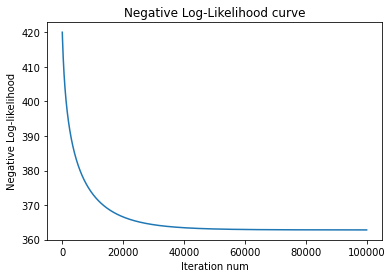

In [108]:
plt.plot([i+1 for i in range(len(model_b.likelihoods))], model_b.likelihoods)
plt.title("Negative Log-Likelihood curve")
plt.xlabel("Iteration num")
plt.ylabel("Negative Log-likelihood")
plt.show()

In [109]:
# Training Misclassification
preds_train_b = model_b.predict(X_train_scaled_b)
1 - accuracy_score(y_train_b, preds_train_b)

# 0.2887788778877888

0.2887788778877888

In [110]:
# Testing Misclassification
preds_test_b = model_b.predict(X_test_scaled_b)
1 - accuracy_score(y_test_b, preds_test_b)

# 0.3201320132013201

0.3201320132013201

## Problem 1.c
- Repeat problem 1.a on the *dexter* dataset

In [59]:
# Data input
X_train_c = pd.read_csv('data/dexter/dexter_train.csv', sep=',', header=None, nrows=300)
y_train_c = pd.read_csv('data/dexter/dexter_train.labels', header=None, nrows=300)

X_test_c = pd.read_csv('data/dexter/dexter_valid.csv', sep=',', header=None, nrows=300)
y_test_c = pd.read_csv('data/dexter/dexter_valid.labels', header=None, nrows=300)

In [60]:
# Normalize the variables of the training set
scaler_c = StandardScaler()
scaler_c.fit(X_train_c)

StandardScaler()

In [61]:
# Transform both the train and test set
X_train_scaled_c = scaler_c.transform(X_train_c)
X_test_scaled_c = scaler_c.transform(X_test_c)

In [62]:
# Prepare data to change -1 into 0s
y_train_c = y_train_c.values.ravel()
y_test_c = y_test_c.values.ravel()

In [63]:
# Change -1 into 0s
for i in range(len(y_train_c)):
    if y_train_c[i] < 0:
        y_train_c[i] = 0
        
for i in range(len(y_test_c)):
    if y_test_c[i] < 0:
        y_test_c[i] = 0

In [64]:
model_c = LogisticRegression_GA(learning_rate=0.005)
model_c.fit(X_train_scaled_c,y_train_c)

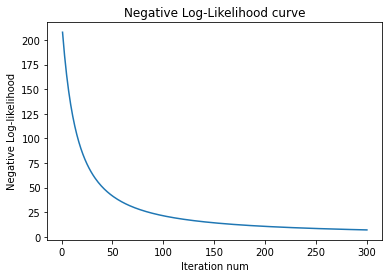

In [65]:
plt.plot([i+1 for i in range(len(model_c.likelihoods))], model_c.likelihoods)
plt.title("Negative Log-Likelihood curve")
plt.xlabel("Iteration num")
plt.ylabel("Negative Log-likelihood")
plt.show()

In [66]:
# Training Misclassification
preds_train_c = model_c.predict(X_train_scaled_c)
1 - accuracy_score(y_train_c, preds_train_c)

0.0

In [67]:
# Testing Misclassification
preds_test_c = model_c.predict(X_test_scaled_c)
1 - accuracy_score(y_test_c, preds_test_c)

0.13666666666666671